In [1]:
%load_ext autoreload
%autoreload 2
from kartapullautin2tiles import make_tiles, load_kartapullautin_dir, extract_and_transform_tile, _get_tile_bb
from pathlib import Path
import numpy as np
import rasterio.merge
from shapely.geometry import Polygon

In [2]:
import mercantile

In [3]:
gpdf = load_kartapullautin_dir(Path("/home/sturm/Downloads/debug"))
gpdf = load_kartapullautin_dir(Path("/home/sturm/Downloads/prodelkamm/out/"))

In [4]:
gpdf.total_bounds

array([ 576000.21166667, 5260999.02633333,  595000.97166667,
       5269999.78633333])

In [5]:
array, transform = rasterio.merge.merge(gpdf["img_file"], bounds=tuple(gpdf.total_bounds), nodata=255, dtype=np.uint8)

In [6]:
t = mercantile.Tile(x=17299, y=11451, z=15)

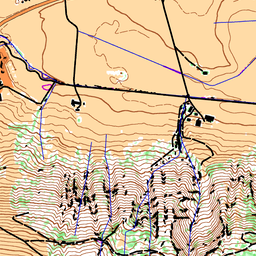

In [7]:
extract_and_transform_tile(array, transform, t, src_crs=gpdf.crs)

In [9]:
make_tiles(gpdf, out_dir=Path("/home/sturm/Downloads/test_png"), min_zoom=12, max_zoom=17)

INFO:kartapullautin2tiles:Working on Tile(x=2161, y=1431, z=12)
INFO:kartapullautin2tiles:Working on Tile(x=2161, y=1432, z=12)
INFO:kartapullautin2tiles:Empty tile, skipping
INFO:kartapullautin2tiles:Working on Tile(x=2162, y=1431, z=12)
INFO:kartapullautin2tiles:Working on Tile(x=2162, y=1432, z=12)
INFO:kartapullautin2tiles:Working on Tile(x=2163, y=1431, z=12)
INFO:kartapullautin2tiles:Working on Tile(x=2163, y=1432, z=12)
INFO:kartapullautin2tiles:Working on Tile(x=2164, y=1431, z=12)
INFO:kartapullautin2tiles:Working on Tile(x=2164, y=1432, z=12)
INFO:kartapullautin2tiles:Empty tile, skipping


In [ ]:
mercantile.bounds(t)

LngLatBbox(west=10.052490234375, south=47.54687159892238, east=10.0634765625, north=47.554286701279565)

In [ ]:
parent_tile = mercantile.Tile(x=2161, y=1432, z=12)

In [ ]:
query_polygon = _get_tile_bb(parent_tile, gpdf.crs)
tmp_df = gpdf.loc[gpdf.intersects(Polygon.from_bounds(*query_polygon))].reset_index()

In [ ]:
tmp_df

,index,id,pgw_file,img_file,geometry


In [ ]:
query_polygon

(570220.9837698945, 5256461.402152156, 576758.9628513317, 5263145.028391968)